In [17]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
import regex as re
import nltk
nltk.download("all")
nltk.download('stopwords')
stop_words = stopwords.words("russian")
morph=pymorphy2.MorphAnalyzer(lang='ru')    
stop_words = stopwords.words("russian")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

<AxesSubplot:xlabel='labels'>

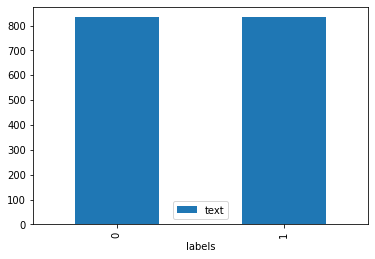

In [18]:
df=pd.read_csv('..\\datasets\\text_dataset\\data.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.dropna(inplace=True)
df.groupby(['labels']).count().plot(kind="bar")

In [19]:
x = df['text']
y = df['labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [20]:
Tfidf_vect = TfidfVectorizer(max_features=1500)
Tfidf_vect.fit(x)

TfidfVectorizer(max_features=1500)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
x_train, x_test = Tfidf_vect.transform(x_train), Tfidf_vect.transform(x_test)

In [22]:
ts = time.time()
SVM = svm.SVC()
SVM.fit(x_train,y_train)
timei = time.time() - ts
print('Time -> ', timei)
# predict the labels on validation dataset
y_pred = SVM.predict(x_test)
# Use accuracy_score function to get the accuracy
acci = accuracy_score(y_pred, y_test)*100
print('SVM Accuracy Score -> ', acci)

Time ->  0.8354775905609131
SVM Accuracy Score ->  95.20958083832335


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       158
           1       0.98      0.93      0.95       176

    accuracy                           0.95       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334



c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


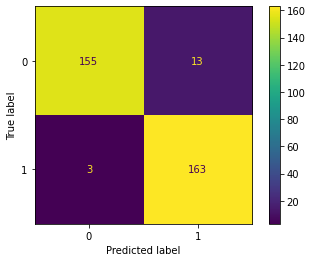

In [23]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, auc, classification_report
print(classification_report(y_pred, y_test))
print(plot_confusion_matrix(SVM, x_test, y_test))

In [24]:
from joblib import dump, load
dump(SVM, 'SVM.joblib') 

['SVM.joblib']

In [25]:
dump(Tfidf_vect,'TF-IDF.joblib')

['TF-IDF.joblib']

In [28]:
def check_text(model, text):
    clean_txt = []
    tokenized_sent = word_tokenize(text.lower().strip(),language="russian")
    tokenized_sent=[morph.parse(x)[0].normal_form for x in tokenized_sent if x not in stop_words and (re.sub(r'[^\w\s]', '', x)!='') and re.search(r'[0-9]+',x) is None and re.search(r'[_a]+',x) is None]
    clean_txt.append(' '.join(tokenized_sent))
    tt = Tfidf_vect.transform(clean_txt)
    y_pred = model.predict(tt)
    print(y_pred)
    if y_pred[0] == 0:
        print('Real news')
    else:
        print('Fake news')


In [29]:
txt = '''Правительство России приняло решение о безвозмездной передаче контрольного пакета в размере 51% акций «Газпрома» министерству энергетики Турции. Такая мера позволит компании подать заявку о снятии всех введённых против неё санкций.

Директор концерна Алексей Миллер пояснил, что «Газпром» будет перерегистрирован как турецкое юрлицо, а состав его правления будет изменён таким образом, чтобы турки составили в нём большинство. Сам Миллер намерен уйти в отставку после выборов нового председателя, на должность которого номинирован бывший министр иностранных дел Турции Ахмет Давутоглу.

После завершения всех регистрационных процедур Турция официально станет крупнейшей газодобывающей и газотранспортной компанией в мире, сообщили в правительстве. Аналогичные переговоры в настоящее время ведутся с компаниями «Ростех», «Роснефть» и «РАО ЕЭС».

«Конечно, никто не будет вводить санкции против турецкой компании, а уже введённые ограничения тотчас снимут, – уверен Алексей Миллер. – Для нас это будет своего рода жест доброй воли в отношении наших союзников. Дивидендные выплаты «Газпрома» помогут поддержать государственный бюджет Турции и сделают её не только газотранспортным хабом, но и крупнейшим газодобытчиком. С нас наконец-то снимут санкции и позволят полететь в Лондон и Цюрих, чтобы повидаться с близкими. Лично я жду этого с нетерпением»'''
check_text(SVM, txt)

[1]
Fake news
